In [1]:
from __future__ import print_function

from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator

import os

In [2]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочных примеров')
print(x_test.shape[0], 'тестовых примеров')

x_train shape: (50000, 32, 32, 3)
50000 тренировочных примеров
10000 тестовых примеров


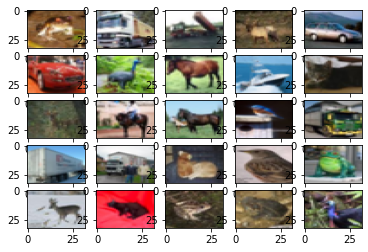

In [4]:
# визуализация данных
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [5]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
input_shape = x_train.shape[1:]

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [6]:
# one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# построение модели
model = Sequential()

# слои нейросети по свертке и пулингу

model.add(Conv2D(32, (5, 5), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(Conv2D(32, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Dropout(0.25))


In [8]:
# полносвязные слои нейросети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [9]:
# инициализация RMSprop optimizer
opt = keras.optimizers.Nadam(learning_rate=0.001, decay=1e-6)

In [10]:
# компиляция модели
model.compile(loss='categorical_crossentropy',
optimizer=opt,
metrics=['accuracy'])

In [11]:
# нормализация данных
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True)
else:
    print('Использование data augmentation в реальном времени')

Использование data augmentation в реальном времени


In [13]:
# Препроцессинг и data augmentation в реальном времени:

datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
zca_epsilon=0,
rotation_range=0,
width_shift_range=0,
height_shift_range=0,
shear_range=0,
zoom_range=0.1,
channel_shift_range=0,
fill_mode='nearest',
cval=0,
horizontal_flip=False,
vertical_flip=False,
rescale=None,
preprocessing_function=None,
data_format=None,
validation_split=0.0)

In [14]:
# запуск data augmentation через fit_generator
model.fit_generator(datagen.flow(x_train, y_train,
batch_size=batch_size),
epochs=epochs,
validation_data=(x_test, y_test),
workers=4)

C:\ProgramData\Anaconda3\envs\tf_gpu37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
1563/1563 [==============================] - 122s 69ms/step - loss: 1.5975 - accuracy: 0.4194 - val_loss: 1.2141 - val_accuracy: 0.5642
Epoch 2/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.1969 - accuracy: 0.5723 - val_loss: 1.0083 - val_accuracy: 0.6415
Epoch 3/10
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0301 - accuracy: 0.6350 - val_loss: 0.9120 - val_accuracy: 0.6791
Epoch 4/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.9249 - accuracy: 0.6730 - val_loss: 0.8728 - val_accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8614 - accuracy: 0.6967 - val_loss: 0.8339 - val_accuracy: 0.7130
Epoch 6/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8095 - accuracy: 0.7165 - val_loss: 0.7820 - val_accuracy: 0.7262
Epoch 7/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.7621 - accuracy: 0.7328 - val_loss: 0

In [15]:
# сохранение модели и весов
#if not os.path.isdir(save_dir):
    #os.makedirs(save_dir)
    #model_path = os.path.join(save_dir, model_name)
    #model.save(model_path)
    #print('сохранить обученную модель как %s ' % model_path)

In [16]:
# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', round(scores[0], 4))
print('Test accuracy:', round(scores[1], 4))

313/313 [==============================] - 4s 14ms/step - loss: 0.7506 - accuracy: 0.7502
Test loss: 0.7506
Test accuracy: 0.7502


==================================================================================================================

Задача улучшить метрику в учебном ноутбуке:


Epoch 1/1

1563/1563 [==============================] - 39s 25ms/step - loss: 1.8751 - acc: $0.3107$

10000/10000 [==============================] - 1s 134us/step - test loss: 1.5636 - test accuracy: $0.4304$

...

Сначала я снизил степень аугментации данных. Уменьшил сложность модели: полносвязных слоев и сверточных. Так, чтобы не тратить часы на обучение нейросетки. Потом увеличил epochs до того момента, когда значения метрики трейна и теста примерно сравняются.

Занимало все равно слишком много времени. Корректировка параметров аугментации или слоев не добавляла точности выше ~ $0.65$

Поэтому я снова усложнил модель.

Полносвязных слоев: 3 (можно увеличить до 4, скорее всего, небольшой, но прирост в accuracy тестовой возможен).

Нейронов или фильтров в слоях: до 512

epochs: 10

batch_size: 32 (одна из главная причин повышения метрики у меня - то, что увеличил количество батчей до 1563)

data_augmentation: True 

Слоев Dropout: 2

Для этого пришлось подключить GPU.

Точность: $0.75$

Считаю, что хороший результат.

В целом, на датасете cifar10 непросто выйти за пределы 0.8000. Изображения низкого качества, даже человеческий глаз на них не покажет точность больше ~85%. 

А вот на MNIST эта нейросеть легко дошла бы до 0.99 и чуть дальше. Может, и менять бы ничего не пришлось.

Датасет CIFAR100 не видел. Но пришлось бы усложнить модель до 16-20 слоев и в свертке и в полносвязных. Ну и еще кое-что:

num_classes = 100 (выходной слой)

epochs = минимум 10000

метод Callbacks использовать, чтобы найти момент с наибольшей метрикой

Оптимизатор настроить: к примеру, момент Нестерова увеличить.

Это для начала.


IMAGENET запросит еще более глубокую нейросеть, так как num_classes = 1000.